In [78]:
'''IMPORTING REQUIRED LIBRARIES'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# warnings.filterwarnings('ignore')
%matplotlib inline
import scipy.stats as stats#we used this library for testing distrubution
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle

In [2]:
'''Reading data set into df'''
df=pd.read_csv('pima-indians-diabetes.csv')
df.columns=['pregnant', 'glucose', 'bp', 'tricep', 'insulin', 'bmi', 'dpf','age', 'target']

#### checking the detailed view of the dataset ,for understanding  any missing values, outliers,is dataset is small or big, distrubution of datasets etc


In [ ]:
df.info()
'''so from here we can understand there are no categorial values, and DPF,BMI are continuos, rest all are discrete values'''

In [ ]:
df.shape
'''from this we can understand data set is small, since outcome is classification, and data set is small, this helps 
us to understand which type of model we can choose to get good accuracy for prediction'''

In [ ]:
df.describe()
'''From this we can understand that outliers and other details,'''

In [ ]:
'''quickly checking the histogram , boxplot to deal know the distrubutions, and outliers '''
df.hist(figsize=(20,10))
'''we can understand that age, insulin,pregnant are skewed(right)'''

In [ ]:
df.boxplot(figsize=(20,10))
'''from here we can understand that outilers are present '''

In [ ]:
df.head(50)

In [ ]:
'''checking any missing values'''
df.isnull().sum()
'''here we can see no null values, so no missing values'''

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DBA7109E48>,
      dtype=object)

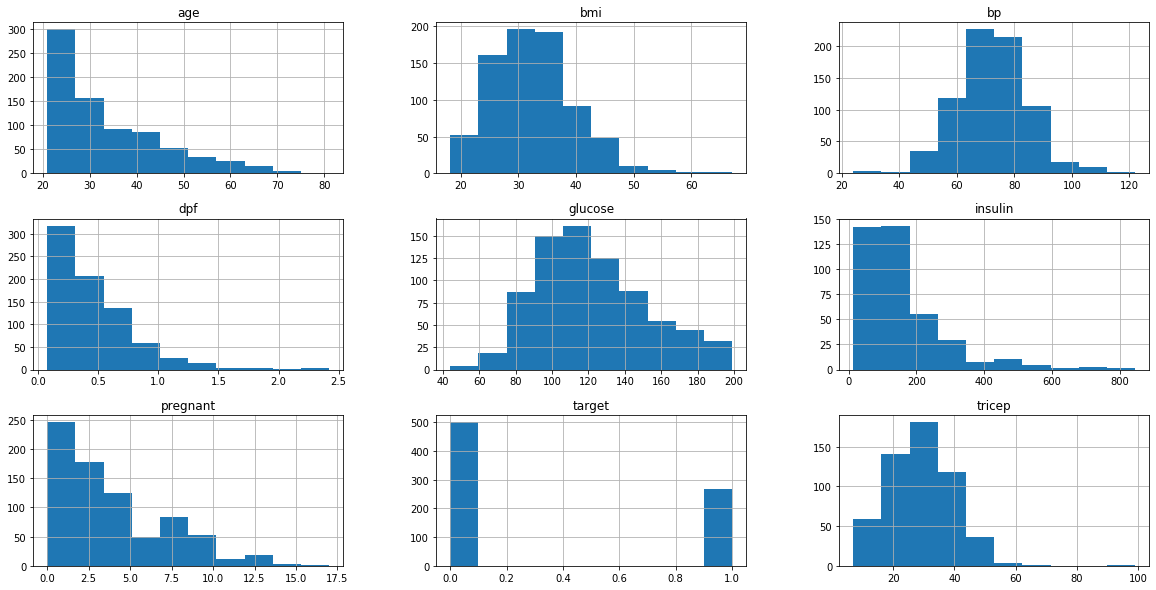

In [3]:
'''But we can see lot of 0 in insulin, BP,TRICEPS which may be wrong , because 0 months pregnant can be acceptable, but 0 insulin cannot be
so this might be a missing values so , from here we can understand the need of missing values'''
'''so quickly converting 0 to na, and then treat the missing values after checking the distrubution for real data we recieved 
without missing values'''
'''before that converting the column names for ease'''


df.columns=['pregnant', 'glucose', 'bp', 'tricep', 'insulin', 'bmi', 'dpf','age', 'target']


'''replacing the 0 values in bp,tricep,insulin,bmi,dfp,age'''
df[['glucose', 'bp', 'tricep', 'insulin', 'bmi', 'dpf','age']]=df[['glucose', 'bp', 'tricep', 'insulin', 'bmi', 'dpf','age']].replace([0],np.NaN)

'''before diving into handling missing values lets just check the characteristics of data'''
df.hist(figsize=(20,10))

In [ ]:
'''still we can see insulin,age, dfp,tricep is affected by outliers, mostly'''
'''we can first treat the missing values then treat the outliers'''
df.isnull().sum()

#  Missing Values

In [4]:
df.target.value_counts()
'''we have good amount of data to train the model so that , it can understand the difference in target variable'''
'''since data is small, i am not thinking to just delete the rows, so there may be loss of data'''
'''we can also see that data missing is not completely random, it may be intentional as whoever missed the insulin, missed the 
values of bp, tricep so it may be missed not at random, so i am using techniques of mean, median, frequent occured'''
print('for target variable 0')
print(df.loc[df.target==0].isnull().sum())
print('for target variable 1')
print(df.loc[df.target==1].isnull().sum())


'''replacing the NAN values in bp,tricep,insulin,bmi,dfp,age'''
df[['glucose', 'bp', 'tricep', 'insulin', 'bmi','dpf','age']]=df[['glucose', 'bp', 'tricep', 'insulin', 'bmi', 'dpf','age']].replace(np.NaN,0)

print(df.loc[df.bp==0].shape)


'''printing tricep and insulin'''
print(df.loc[(df.tricep==0) & (df.insulin!=0)].shape)
'''printing bp, insulin'''
print(df.loc[(df.bp==0) & (df.insulin!=0)].shape)
'''printing bp,tricep,insulin '''
print(df.loc[(df.bp!=0) &(df.tricep!=0) & (df.insulin==0)].shape)
'''printing glucose'''
print(df.loc[df['glucose']==0].shape)
'''printing bmi'''
print(df.loc[df['bmi']==0])
'''from above perfectly we can understand that there is relation in missing the values of insulin, bp,tricep and missing of other values can be at random'''

for target variable 0
pregnant      0
glucose       3
bp           19
tricep      139
insulin     236
bmi           9
dpf           0
age           0
target        0
dtype: int64
for target variable 1
pregnant      0
glucose       2
bp           16
tricep       88
insulin     138
bmi           2
dpf           0
age           0
target        0
dtype: int64
(35, 9)
(0, 9)
(0, 9)
(145, 9)
(5, 9)
     pregnant  glucose    bp  tricep  insulin  bmi    dpf  age  target
9           8    125.0  96.0     0.0      0.0  0.0  0.232   54       1
49          7    105.0   0.0     0.0      0.0  0.0  0.305   24       0
60          2     84.0   0.0     0.0      0.0  0.0  0.304   21       0
81          2     74.0   0.0     0.0      0.0  0.0  0.102   22       0
145         0    102.0  75.0    23.0      0.0  0.0  0.572   21       0
371         0    118.0  64.0    23.0     89.0  0.0  1.731   21       0
426         0     94.0   0.0     0.0      0.0  0.0  0.256   25       0
494         3     80.0   0.0     0.0

'from above perfectly we can understand that there is relation in missing the values of insulin, bp,tricep and missing of other values can be at random'

##### even though more models dont make assumptions of distruibution, it is always good to be normal distrubution, as per central limit therom. so i am will be replace the missing value which will result in good shape

In [5]:
''' approach i will be following is , will impute with median mean, and  also random values, and for better approximation 
i will compute mean, median as per target variable because there is observable variance in insuiln, bp, skin levels with respect to target variable also'''
#sns.boxplot(df.bmi)
'''bmi can be imputed with resepect to mean or median)'''
#bmi missing value change
df['bmi']=df['bmi'].replace([0],df['bmi'].median())
#df.bmi.hist(bins=50)
#glucose missing value change
df['glucose']=df['glucose'].replace([0],df['glucose'].median())
#df.glucose.hist(bins=50)

In [6]:
#just making easy to check the plots
def check_dist(x,y):
    fig = plt.figure()
    ax = fig.add_subplot(121)
    df[x].plot(kind='kde', ax=ax)
    df[y].plot(kind='kde', ax=ax, color='red')
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')


In [7]:
'''now changing missing values of insulin, bp,tricep'''
'''replacing the 0 values in bp,tricep,insulin,bmi,dfp,age'''
df[['bp', 'tricep', 'insulin']]=df[['bp', 'tricep', 'insulin']].replace([0],np.NaN)

def impute_na(col):
    
    #equating column with mean and median values with respect to thier target
    #mean

    df[col+"_mean"]=df[col].copy()
    df.loc[(df['target'] == 0 ) & (df[col+"_mean"].isnull()), col+"_mean"]=df.loc[(df['target'] == 0 ) & (df[col+"_mean"].isnull()), col+"_mean"].fillna(df.groupby(df.target)[col].mean()[0])
    df.loc[(df['target'] == 1 ) & (df[col+"_mean"].isnull()), col+"_mean"]=df.loc[(df['target'] == 1 ) & (df[col+"_mean"].isnull()), col+"_mean"].fillna(df.groupby(df.target)[col].mean()[1])
#     df[col+"_mean"]=np.where(df.loc[(df['target'] == 0 ) & (df[col+"_mean"].isnull())]==np.Nan,df.groupby(df.target)[col].mean()[0],df[col+"_mean"])
#     df[col+"_mean"]=np.where(df.loc[(df['target'] == 0 ) & (df[col+"_mean"].isnull())]==np.Nan,df.groupby(df.target)[col].mean()[0],df[col+"_mean"])
    check_dist(col+"_mean",col)
    #median
    df[col+"_median"]=df[col].copy()
    df.loc[(df['target'] == 0 ) & (df[col+"_median"].isnull()), col+"_median"]=df.loc[(df['target'] == 0 ) & (df[col+"_median"].isnull()), col+"_median"].fillna(df.groupby(df.target)[col].median()[0])
    df.loc[(df['target'] == 1 ) & (df[col+"_median"].isnull()), col+"_median"]=df.loc[(df['target'] == 1 ) & (df[col+"_median"].isnull()), col+"_median"].fillna(df.groupby(df.target)[col].median()[1])
    check_dist(col+"_median",col)
    #median
    df[col+"_full_median"]=df[col].replace(np.NaN,df[col].median())
    check_dist(col+'_full_median',col)
    #mean
    df[col+"_full_mean"]=df[col].replace(np.NaN,df[col].mean())
    check_dist(col+'_full_mean',col)
    #random
    df[col+"_random"]=df[col].copy()
    ##It will have the random sample to fill the na
    random_sample=df[col].dropna().sample(df[col].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[col].isnull()].index
    df.loc[df[col].isnull(),col+'_random']=random_sample
    check_dist(col+'_random',col)

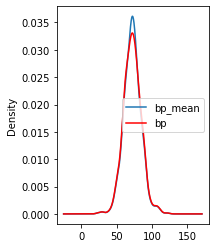

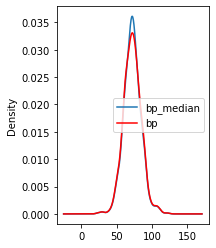

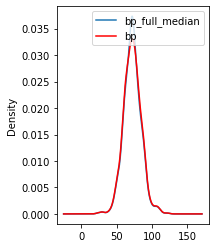

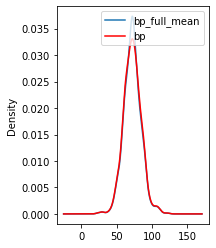

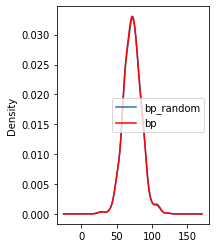

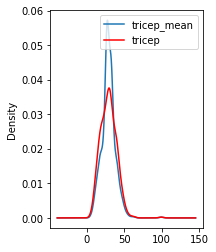

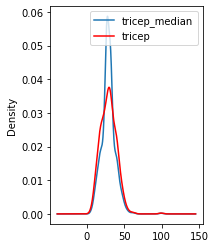

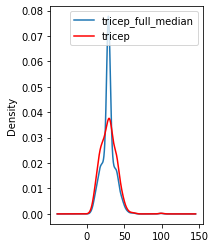

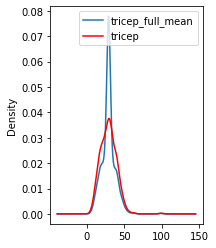

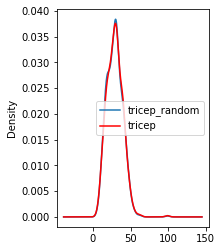

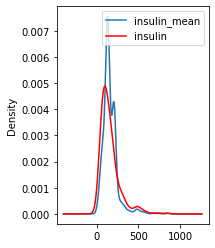

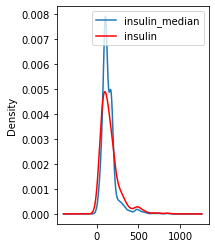

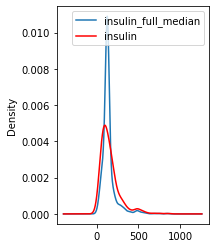

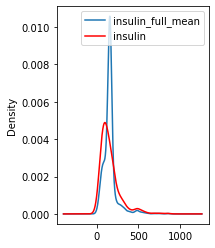

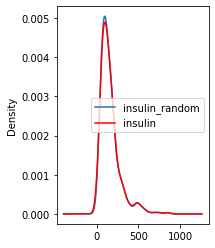

In [8]:
for i in ['bp','tricep','insulin']:
    impute_na(i)

In [9]:
'''from above observations we can change bp with bp_median,tricep with tricep_median,insulin with insulin_median
we can also change with random values, but it may lead to overfitting so its good we can take median as approxiamtion'''
'''dropping unnecasscary columns'''
df.columns
df_Full_Impute=df.copy()
df=df.loc[:,['pregnant','glucose','bp_median','tricep_median','insulin_median','bmi','dpf','age','target']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DBA9008B08>,
      dtype=object)

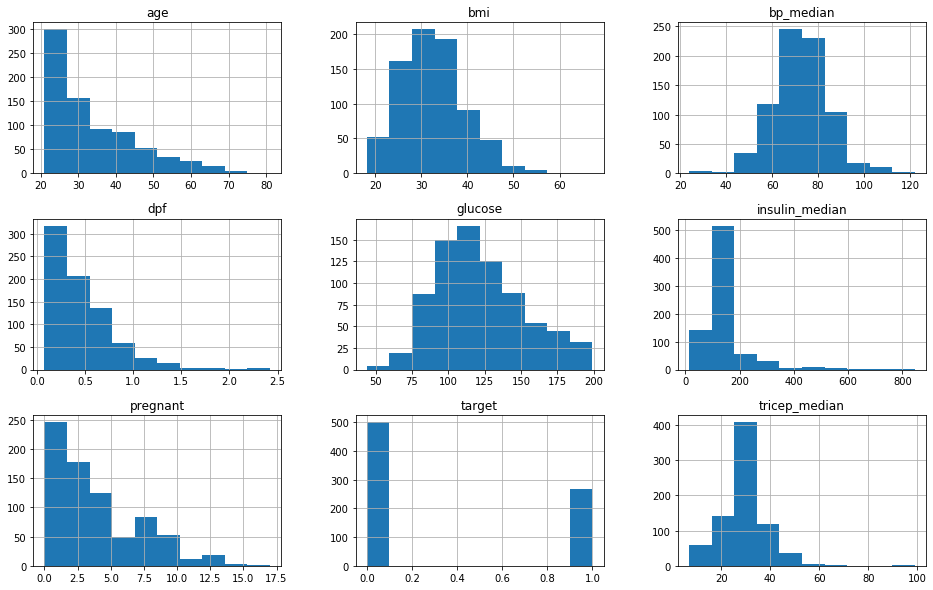

In [10]:
df.hist(figsize=(16,10))

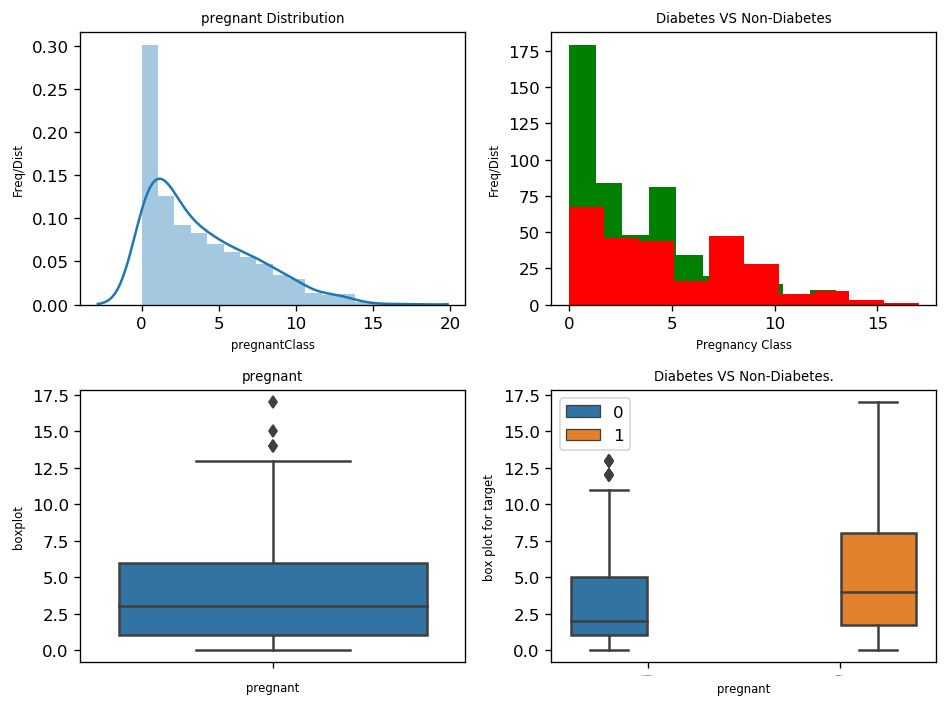

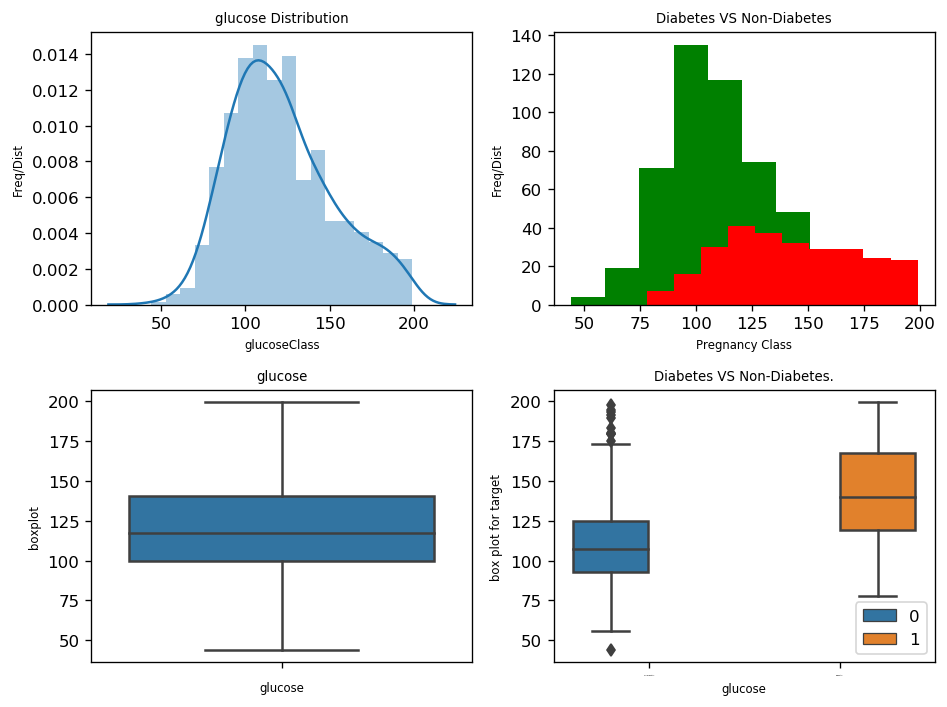

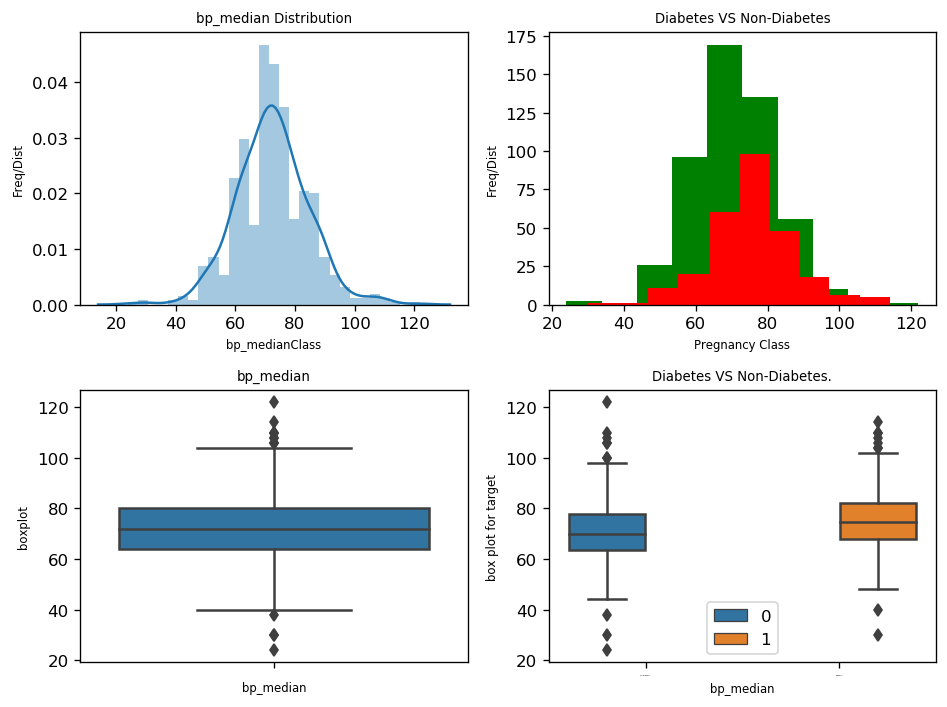

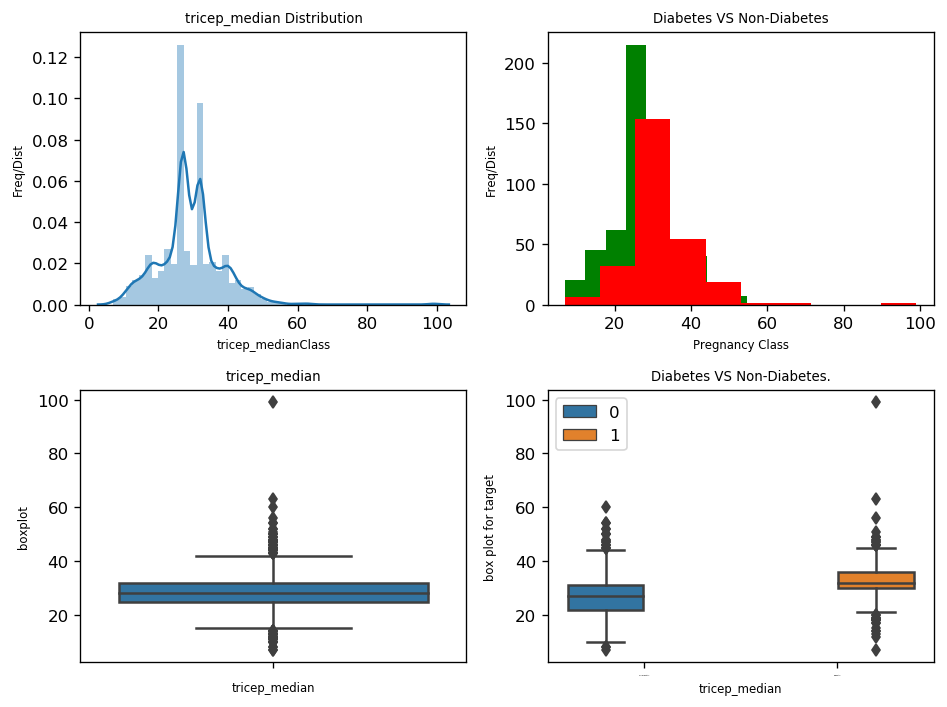

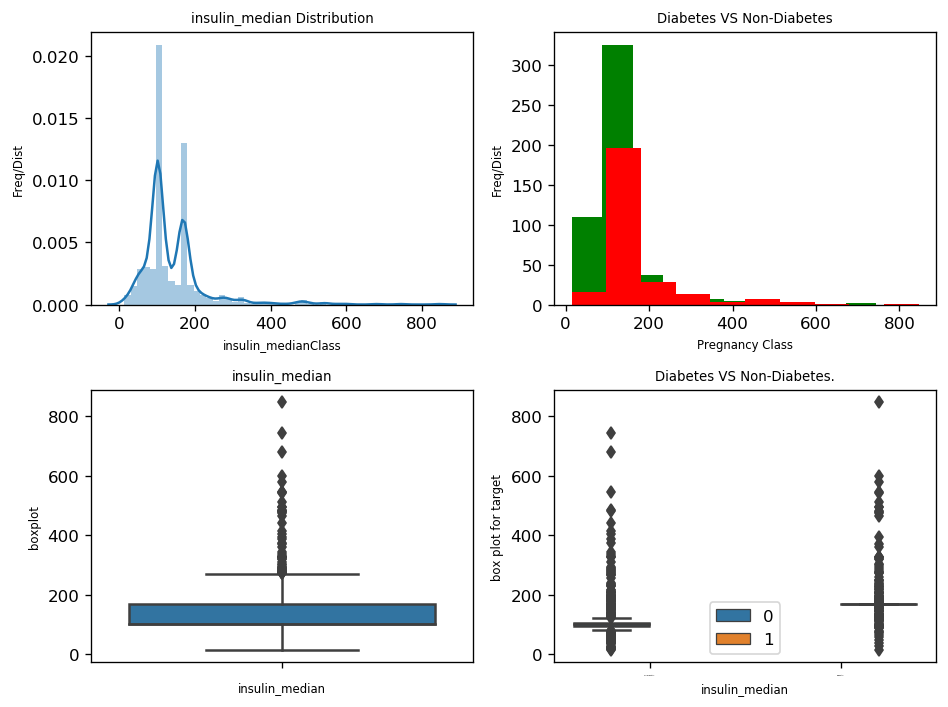

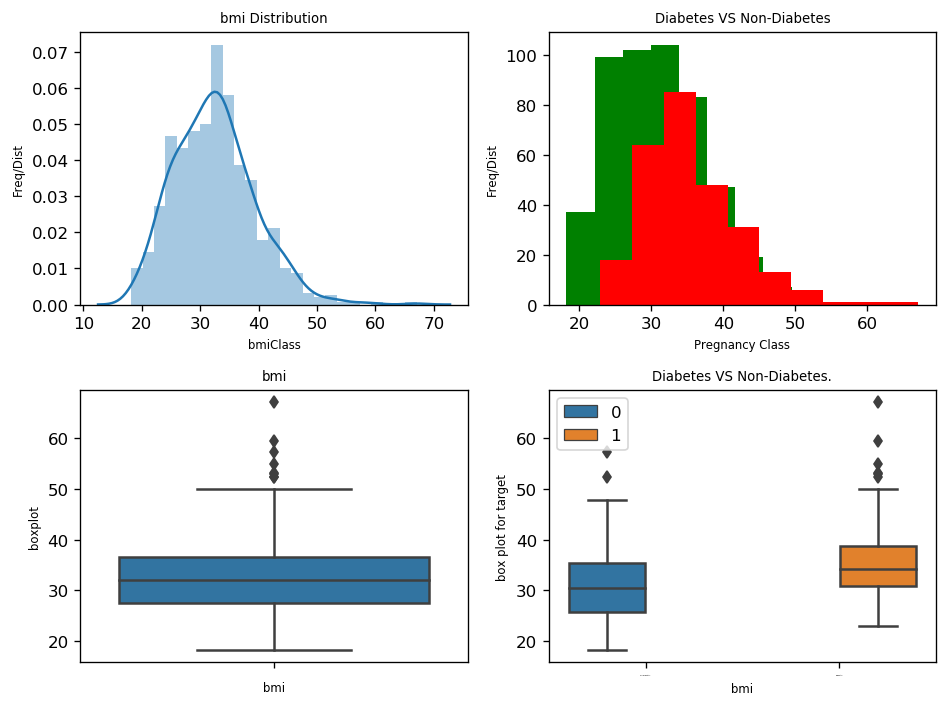

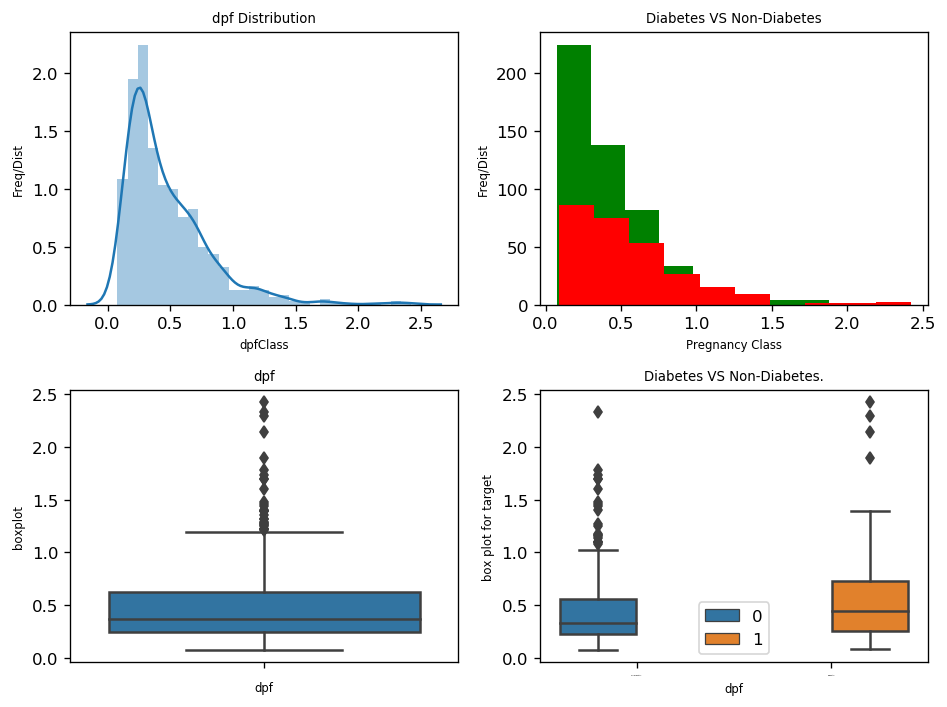

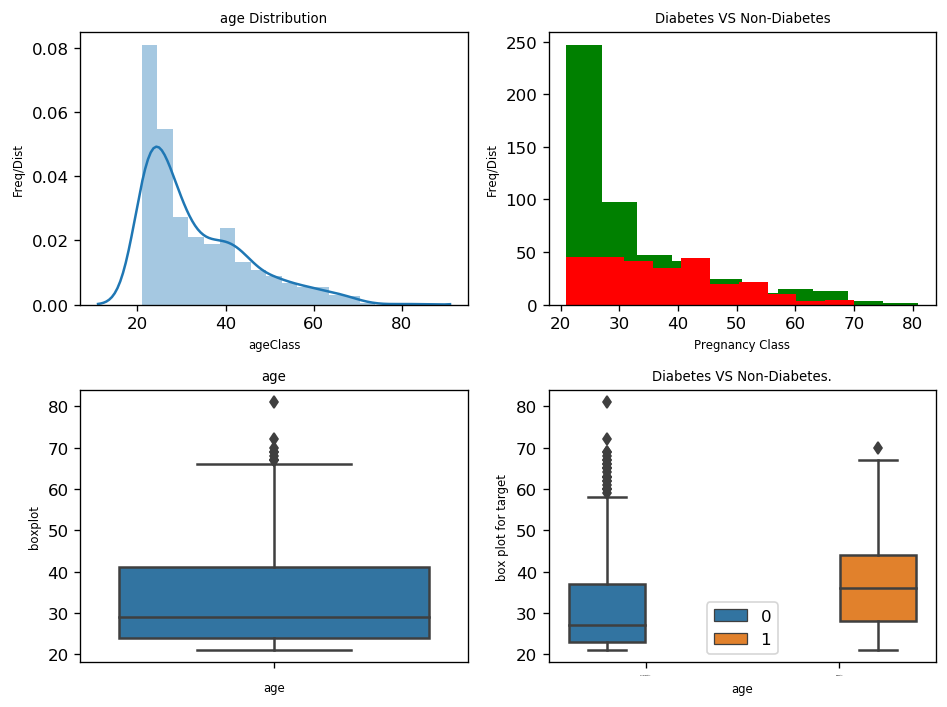

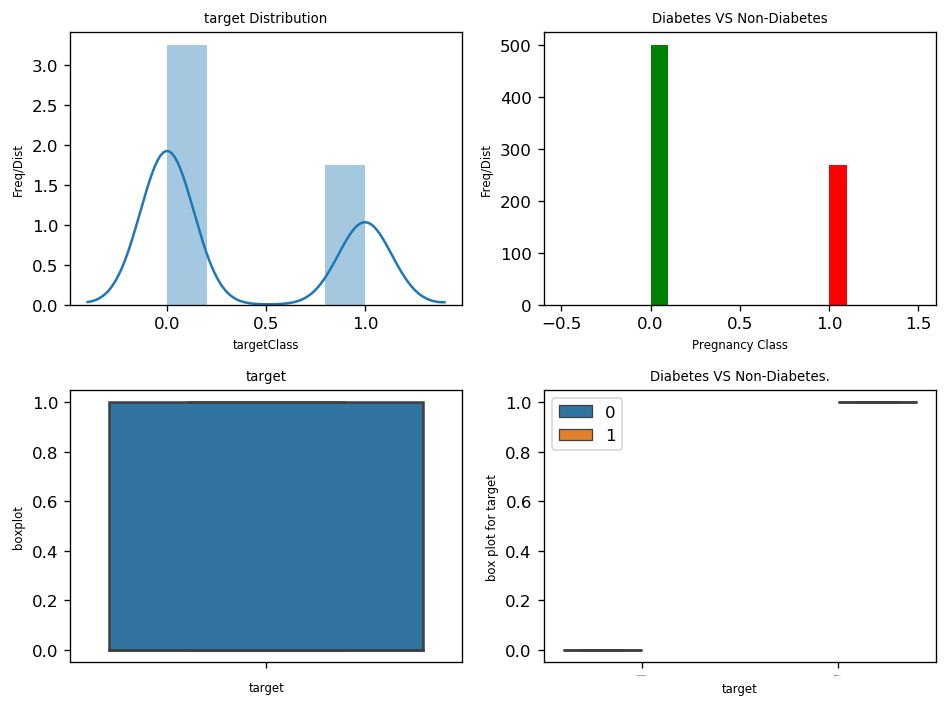

In [11]:
#for checking univariate analysis:
def univariate_analyis(col):
    fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (8,6))
    sns.distplot(df[col],ax=axes[0][0])
    axes[0][0].set_title(col+' Distribution',fontdict={'fontsize':8})
    axes[0][0].set_xlabel(col+'Class',fontdict={'fontsize':7})
    axes[0][0].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
    plt.tight_layout()

    df[df['target']==0][col].plot.hist(ax=axes[0][1],label='Non-Diabeties',color='green')
    df[df['target']==1][col].plot.hist(ax=axes[0][1],label='Diabetes',color='red')
    axes[0][1].set_title('Diabetes VS Non-Diabetes',fontdict={'fontsize':8})
    axes[0][1].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
    axes[0][1].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
    plt.tight_layout()

    sns.boxplot(df[col],ax=axes[1][0],orient='v')
    axes[1][0].set_title(col,fontdict={'fontsize':8})
    axes[1][0].set_xlabel(col,fontdict={'fontsize':7})
    axes[1][0].set_ylabel('boxplot',fontdict={'fontsize':7})
    plt.tight_layout()

    sns.boxplot(x='target',y=col,data=df,ax=axes[1][1],hue=df.target)
    axes[1][1].set_title('Diabetes VS Non-Diabetes.',fontdict={'fontsize':8})
    axes[1][1].set_xlabel(col,fontdict={'fontsize':7})
    axes[1][1].set_ylabel('box plot for target',fontdict={'fontsize':7})
    plt.xticks(ticks=[0,1],labels=['Non-Diabetes','Diabetes'],fontsize=1)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

for i in df.columns:
    univariate_analyis(i)

In [12]:

'''Descriptive statistics and inferential statistics'''
'''step 1: find correlation '''
'''we can do descriptive anlyis on the univariate, multivariate, check for muliti collinearity also with thershold'''
'''Q1:checking probality of high insulin people will be diabetic'''

'''step 1-2: draw pair plot , check relation between each variable and outcome and check any variable with good relation
then check mean of it.visulazei boxplots with respect to their  and then do step2 on one column which seems like normal distrubution
step 2: we should perfrom normal distrubution test shipro on any one of the feature and then perfom q1 on that
   :for this we should plot qqlot,violinplot  and then we do shipro test. and then we get probability of high feature wil be diabetic,'''

'step 1-2: draw pair plot , check relation between each variable and outcome and check any variable with good relation\nthen check mean of it.visulazei boxplots with respect to their  and then do step2 on one column which seems like normal distrubution\nstep 2: we should perfrom normal distrubution test shipro on any one of the feature and then perfom q1 on that\n   :for this we should plot qqlot,violinplot  and then we do shipro test. and then we get probability of high feature wil be diabetic,'

In [13]:
'''Now  i am finding correlation by normal and also  heatmap visualzation from where we can analyse
the relation between each columns '''
df.corr()
'''this uses spearman correlation default , as we can see from above univariate analysis disturbutions are not 
normally distrubuted we are going with spearman correlation only'''

'this uses spearman correlation default , as we can see from above univariate analysis disturbutions are not \nnormally distrubuted we are going with spearman correlation only'

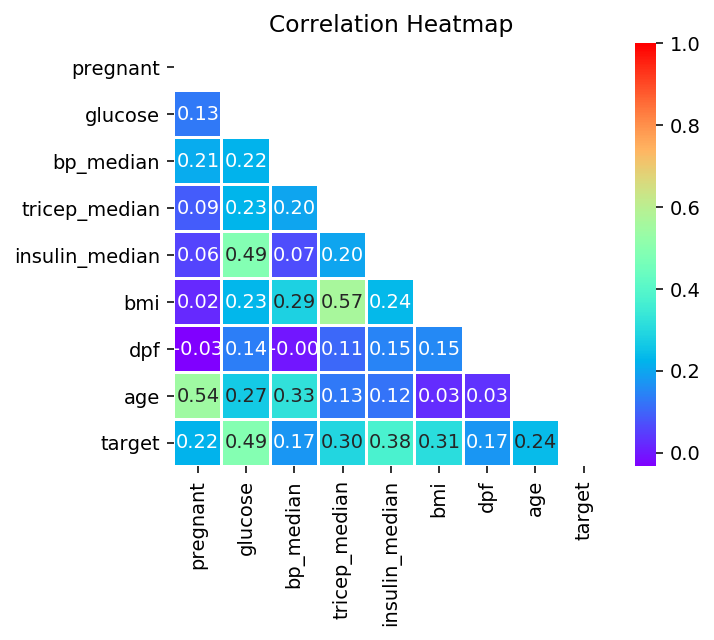

In [14]:
plt.figure(dpi=140,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'rainbow')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

<Figure size 840x560 with 0 Axes>

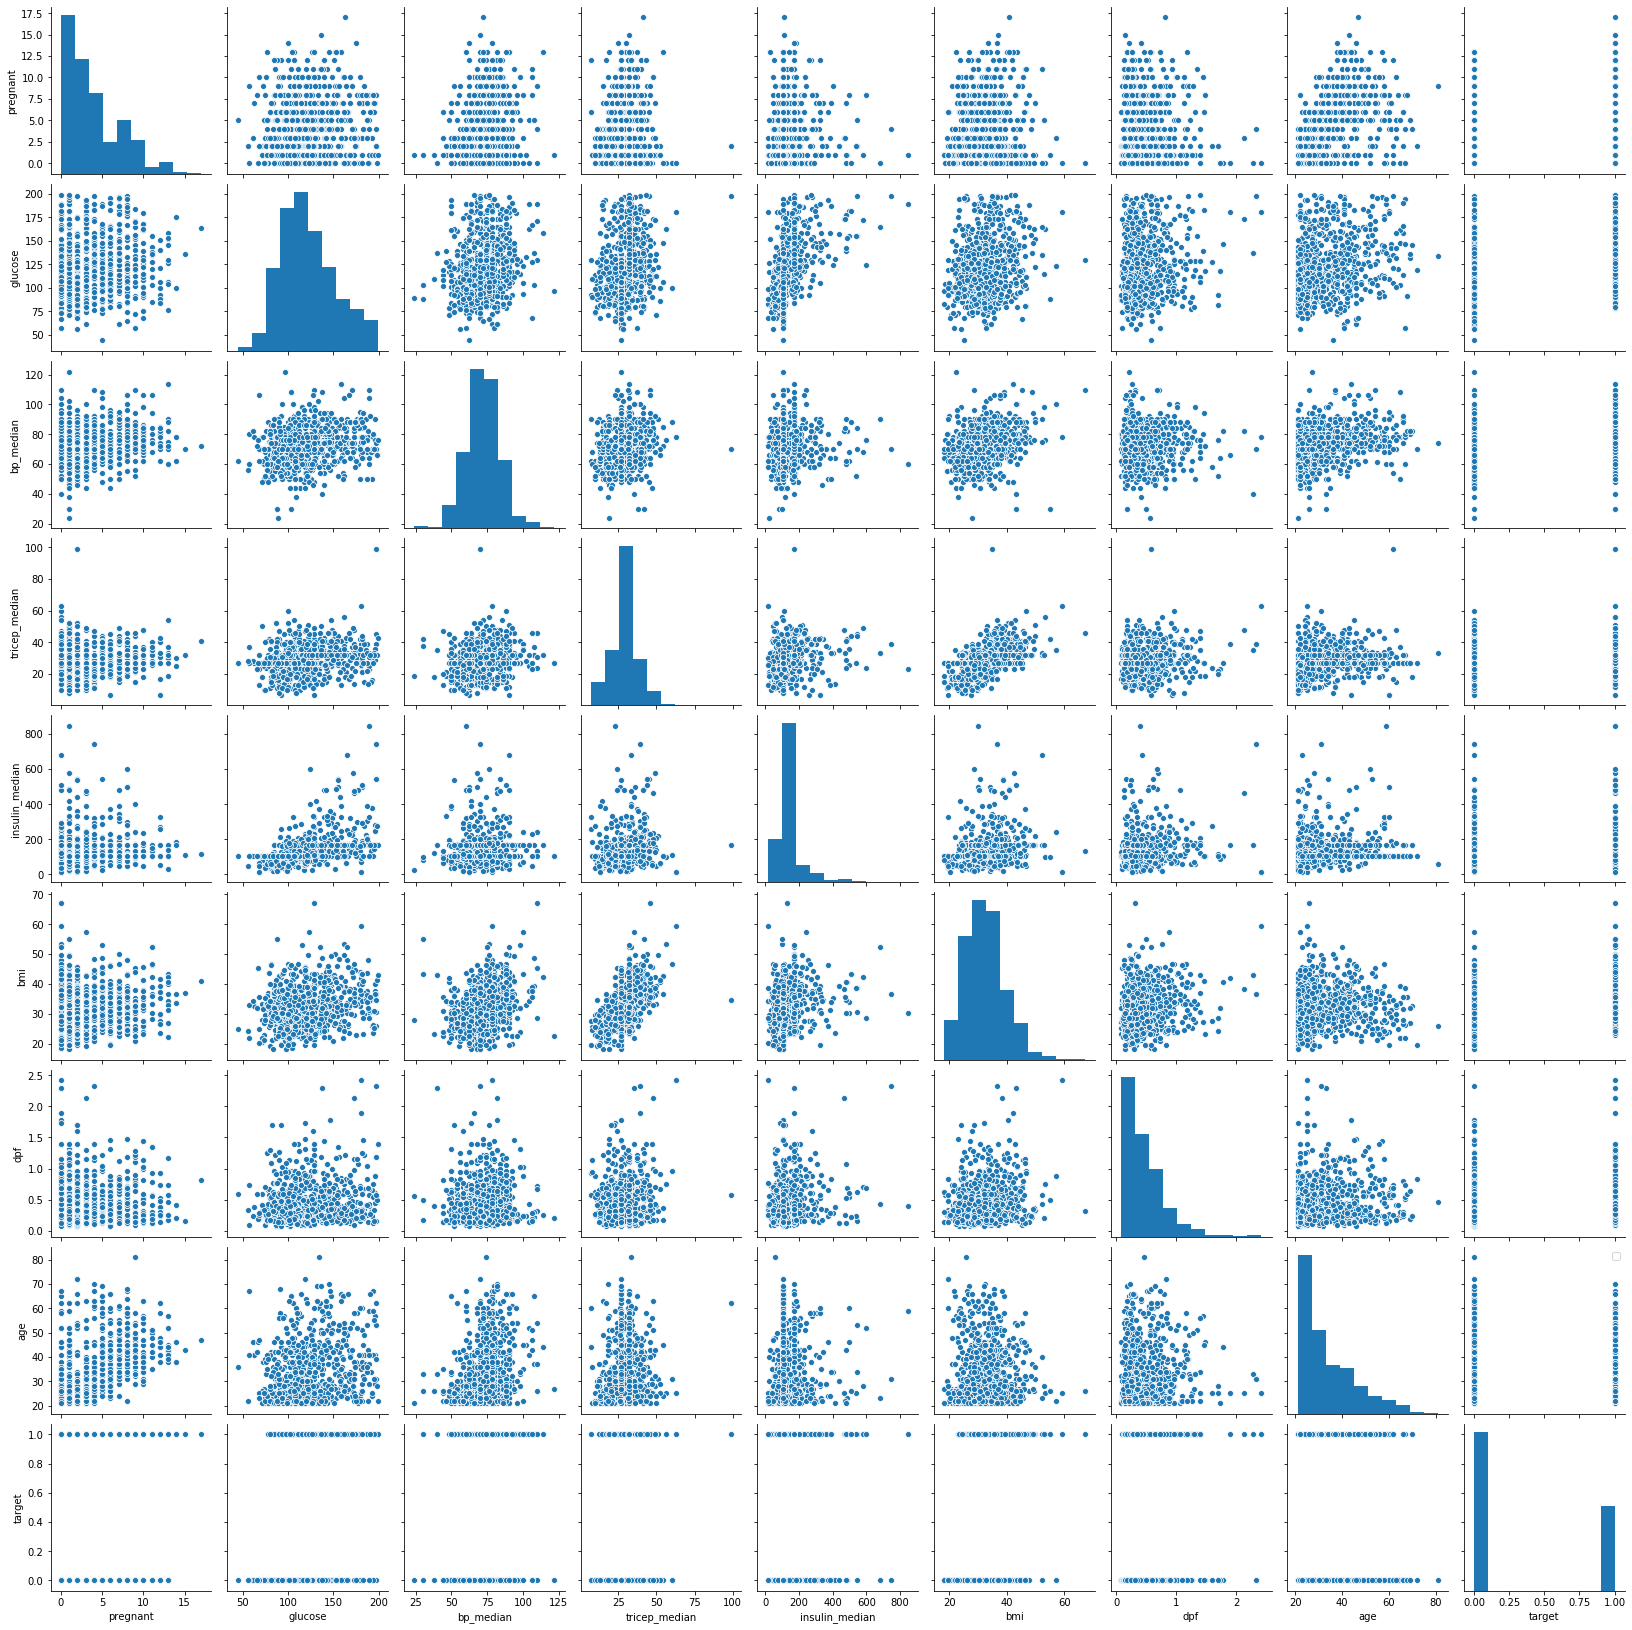

'from above pair plot we can make some conclusions\n1.glucose,bp,tricep,insulin are approximated to normal distrubution\n2.pregnant,dpr,age are skewed to left \n3.(bmi,tricep),(age,pregnant)(but this is not perfectly related),(inslulin,glucose)-->even though heatmap,says that they are \ngoodly correlated we can observe that from pair plot it is clear that the graph is like no relation between them.\n4.since every correlated pair is looking like lightly correaled we would be ignoring the concept of multicollinearity, and\nconsidering all the feature will be good result'

In [15]:
'''we can observe that (age, pregnant),(tricep,bmi) are correlated positively'''
'''plotting the pair plot to see mutlivariant analysis'''

plt.figure(dpi = 140)
sns.pairplot(df)
plt.legend(['Non Diabetic','Diabetic'])
plt.show()
'''from above pair plot we can make some conclusions
1.glucose,bp,tricep,insulin are approximated to normal distrubution
2.pregnant,dpr,age are skewed to left 
3.(bmi,tricep),(age,pregnant)(but this is not perfectly related),(inslulin,glucose)-->even though heatmap,says that they are 
goodly correlated we can observe that from pair plot it is clear that the graph is like no relation between them.
4.since every correlated pair is looking like lightly correaled we would be ignoring the concept of multicollinearity, and
considering all the feature will be good result'''

In [16]:
'''Here we will check whether our assumption of curve are corrrect or not'''
'''Null Hypothesis (H0)  and the Alternate Hypothesis is represented by (H1 or Ha).

"Null hypothesis" usually refers to a general statement or default position that there is no relationship between 
two measured phenomena. Rejecting the null hypothesis concludes that there is no validity to believe that there is a
relationship between the two phenomena.'''
'''here we would be checking distrubution with respect to graphical test and numerical test(however we have already seen graphicaltest like histogram here i will be checking with qqplot)'''
def is_normal(col,df):  
    #numerical test
    #for numerical i am using shipro test
    from scipy.stats import shapiro
    statistics, p = shapiro(df[col])
    print("Shapiro-Wilk Normality Test for  "+col+" : W Statistics - ",statistics, "P value - ", p)
    '''here once the p values is greater , then we cannot reject the hypothesis'''
    stats.probplot(df[col], dist="norm",plot=plt)
    plt.show()

    

Shapiro-Wilk Normality Test for  pregnant : W Statistics -  0.9042782783508301 P value -  1.6080885881590613e-21


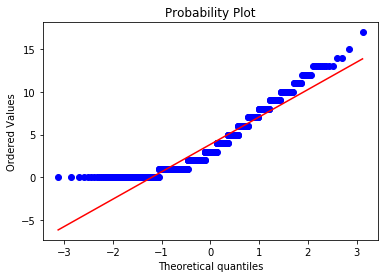

Shapiro-Wilk Normality Test for  glucose : W Statistics -  0.9696223139762878 P value -  1.5240374934277767e-11


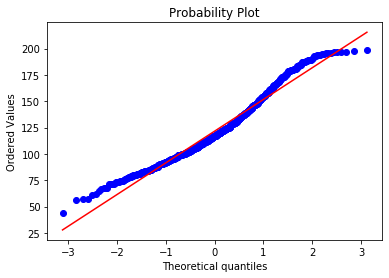

Shapiro-Wilk Normality Test for  bp_median : W Statistics -  0.9882556200027466 P value -  7.92563059803797e-06


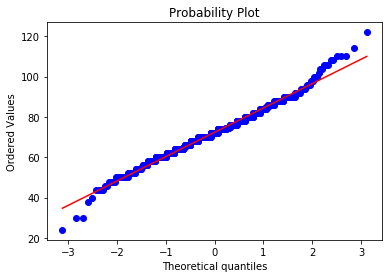

Shapiro-Wilk Normality Test for  tricep_median : W Statistics -  0.9490076303482056 P value -  1.2570854086683698e-15


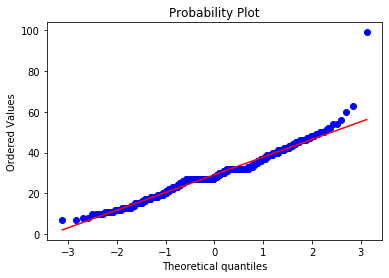

Shapiro-Wilk Normality Test for  insulin_median : W Statistics -  0.7211034297943115 P value -  7.175844294680521e-34


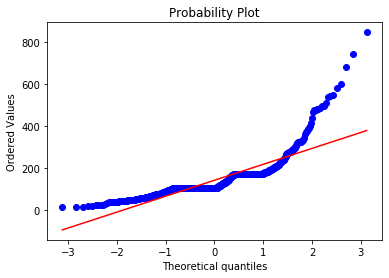

Shapiro-Wilk Normality Test for  bmi : W Statistics -  0.9794020652770996 P value -  6.255587603476442e-09


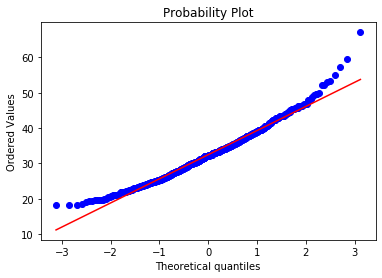

Shapiro-Wilk Normality Test for  dpf : W Statistics -  0.8365186452865601 P value -  2.477696547502535e-27


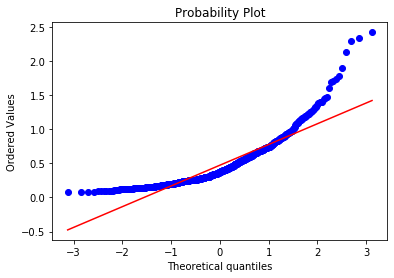

Shapiro-Wilk Normality Test for  age : W Statistics -  0.8747662305831909 P value -  2.401946561183188e-24


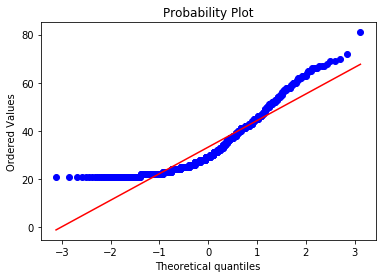

Shapiro-Wilk Normality Test for  target : W Statistics -  0.602509617805481 P value -  1.2922618893873923e-38


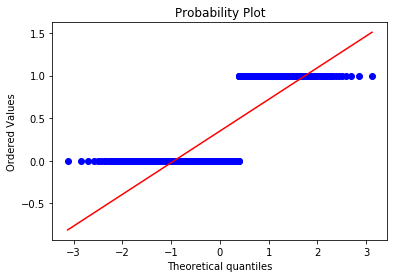

'so , we can use transformations like log,exp etc to make it normally distrubution, but since i am trying with tree modelling, we can ignore'

In [17]:
for i in df.columns:
    is_normal(i,df)
'''seems like every column is rejected the hypothesis, so our conclusionabout distrubution is wrong..maybe one of reason here is lot of outliers in each column'''
'''so , we can use transformations like log,exp etc to make it normally distrubution, but since i am trying with tree modelling, we can ignore'''

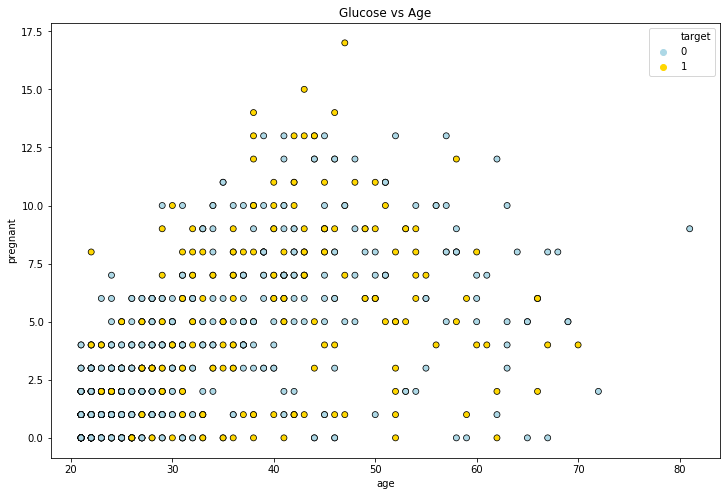

'here we are actullay understanding that if age of is high and no of time pregenency no is more then how chance ,they be diebetics or not'

In [18]:
'''now lets understand relation between the ((bmi,tricep),(age,pregnant))'''
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = df['age'], y = df['pregnant'], hue = "target",
                    data = df, palette = palette, edgecolor=edgecolor)

plt.title('Glucose vs Age')
plt.show()
'''here we are actullay understanding that if age of is high and no of time pregenency no is more then how chance ,they be diebetics or not'''

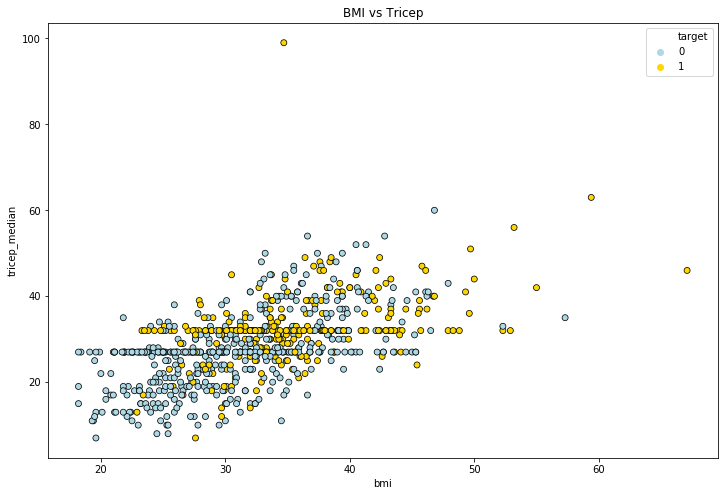

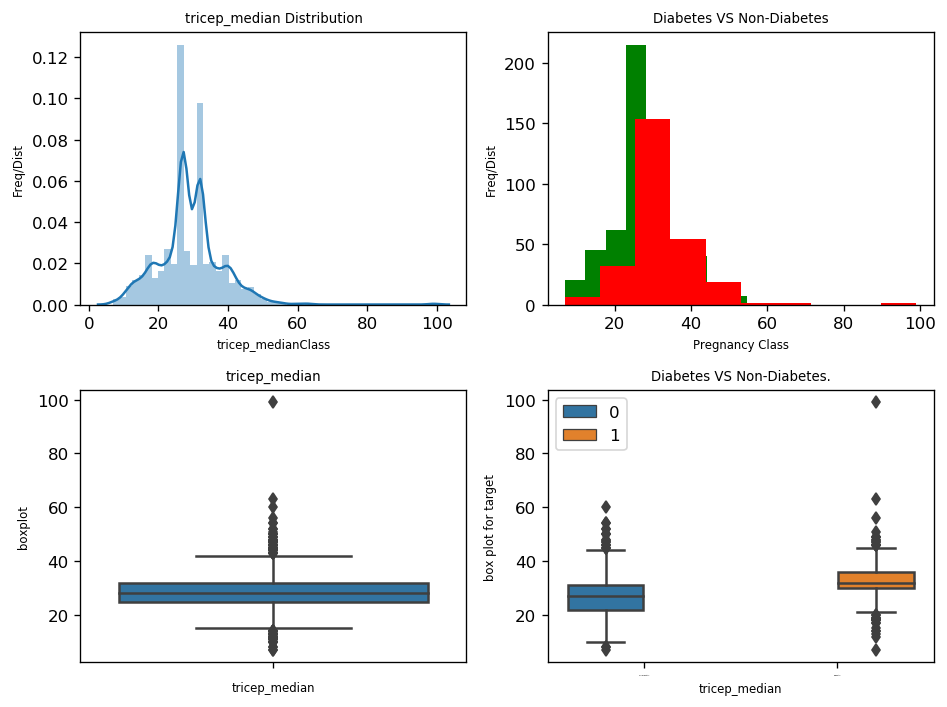

'from univariate analysis it is clear that average value of tricep is high than average value of tricep at target=0'

In [19]:
'''we can clearly see from plot, tht even though age is minimum  and no of pregency is high they are diabetics
age is medium, and irrespective of pregenancy they are diabetics ,same towards high age,so deciding to ignore any one can lead to loss of data'''
'''now checking with respect to bmi,tricep'''
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = df['bmi'], y = df['tricep_median'], hue = "target",data = df, palette = palette, edgecolor=edgecolor)

plt.title('BMI vs Tricep')
plt.show()
'''here we are actullay understand that bmi and tricep are actually correlated and
we can also observe that if bmi and tricep are low then risk of diebetis are low 
and if skin is high and bmi is less and also when skin is high and bmi is high then that cases risk of diabetis is high
that skin is low and bmi is high then the chances is diabetis is low only,so once we can come to conclusion that skin is imp feature for target 
and as skin increases tricep also increases,and correlation is not low but medium'''
'''once consider the skin and target so that we can be sure of the effect of skin values on target'''
univariate_analyis('tricep_median')
'''from univariate analysis it is clear that average value of tricep is high than average value of tricep at target=0'''

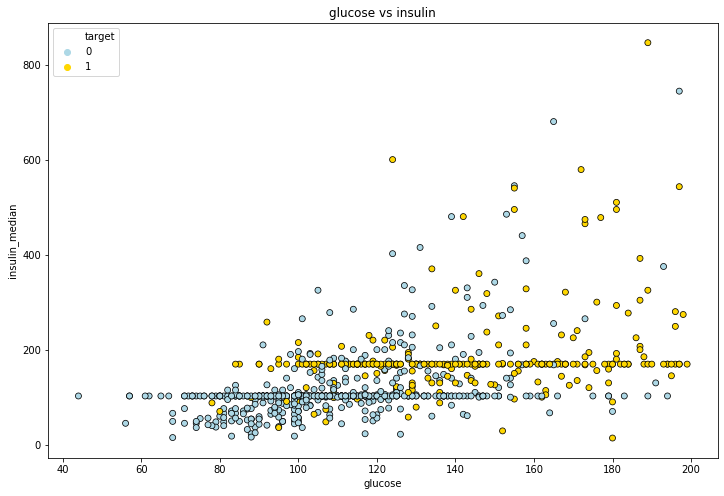

In [20]:
'''now its really important to check insulin,glucose as theoritically we know diabetic is due to high insulin, glucose values'''
'''lets check the relation btn them first then do univariate analysis on them with respect to target, however from heatmap
we came to know that relation between them is weak positive correlation,
and correlation between target and glucose is high, and second after glucose , target is varying with insulin value,
so lets understand visually'''
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = df['glucose'], y = df['insulin_median'], hue = "target",
                    data = df, palette = palette, edgecolor=edgecolor)

plt.title('glucose vs insulin')
plt.show()

In [21]:
'''from above we get know that higher the values of glucose we higher the'risk of becoming diabetic, and less the insulin values,
and higher the glucose value risk is still low, and at insulin value nearly at 200, irrespective of glucose value 
the risk to be diabetic is still high, so it seems at this point the target value is depending not only on glucose,insulin but also other variable
, so from above we can come to conclusion that both the columns, are needed to train the model and outliers of both values are important to train the model and 
reducing the underfittin'''
'''so, from above univariate analyis of glucose and insulin we can conclude that glucose ,insulin values of diabetic people is
higher that of insulin, glucose values of non diabetic people)'''


'''understanding target with all values will be good for knowing how it is related to '''


'understanding target with all values will be good for knowing how it is related to '

In [22]:
#feature selection

'''from below we can see that variance of dpf is very low, and we can ignore dpf, but while considering not
loosing the data, as (dpf,target) are weak positive correlated, still it can help us to get good outcome, so eliminating is
not a good choice here as data set also small, and have less number of features,so i am considering all the features'''
df.var()


pregnant            11.354056
glucose            926.489244
bp_median          146.556183
tricep_median       79.046676
insulin_median    7938.960871
bmi                 47.270664
dpf                  0.109779
age                138.303046
target               0.227483
dtype: float64

In [23]:
'''we can also observe that there is lot of variance in insulin, glucose, so its better to treat outlier by scaling , as 
here outliers carry information i am not removing outliers'''

'we can also observe that there is lot of variance in insulin, glucose, so its better to treat outlier by scaling , as \nhere outliers carry information i am not removing outliers'

#### splitting data set

##### we can use train_test_split, but as data set small, it is always good to cross _Validation to make sure ur data is unbiased and we will be not missing the data  in training data set by making it test data.


#### modelselection


In [24]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X.isnull().sum()

pregnant          0
glucose           0
bp_median         0
tricep_median     0
insulin_median    0
bmi               0
dpf               0
age               0
dtype: int64

In [25]:
#Tranformations

scaler=StandardScaler()
### fit vs fit_transform
df_scaled=scaler.fit_transform(df)



In [50]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=10)

In [51]:

def cross_validation(model):
    clf = make_pipeline(preprocessing.StandardScaler(), model)
    scores = cross_validate(clf, X_train, Y_train, scoring='accuracy',cv = KFold(n_splits=5))
    sorted(scores.keys())
    print("Accuracy for "": %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))

In [52]:
#listing the model to be done,

#logistic regression

lr=LogisticRegression()

#random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=10)

#GRADIENT BOOSTING CLASSIFIER

from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

#Knn 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

#DESICION TREE
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# #XGBOOST 
# import xgboost as xgb
# xgbcl = xgb.XGBClassifier()

#SVc
from sklearn.svm import SVC
svc=SVC(gamma='auto')

models=[lr,rf,gbc,knn,dtc,svc]
for i in models:
    cross_validation(i)

Accuracy for : 0.77 (+/- 0.11)
Accuracy for : 0.89 (+/- 0.05)
Accuracy for : 0.89 (+/- 0.03)
Accuracy for : 0.80 (+/- 0.10)
Accuracy for : 0.85 (+/- 0.09)
Accuracy for : 0.82 (+/- 0.06)


In [ ]:
'''from above we can consider any one of rf,gbc,svc'''
'''we can understand that, since data is effected by outliers there is low accuracy in logistic regression'''


#### parameter tuning

In [ ]:
''' here i will be doing with respect to random forest and GradientBoostingClassifier'''
''' GridSearchCV exhaustively considers all parameter combinations, while RandomizedSearchCV can sample a given number of values 
from a parameter space with a specified distribution'''

###### The main parameters used by a Random Forest Classifier are:

criterion = the function used to evaluate the quality of a split.
max_depth = maximum number of levels allowed in each tree.
max_features = maximum number of features considered when splitting a node.
min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
min_samples_split = minimum number of samples necessary in a node to cause node splitting.
n_estimators = number of trees in the ensamble.

In [83]:


def create_model(clf):
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt','log2']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 1000,10)]
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10,14]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4,6,8]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                  'criterion':['entropy','gini']}
    print(random_grid)

    model_randomcv=RandomizedSearchCV(estimator=clf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                                   random_state=100,n_jobs=-1,scoring='accuracy')
    ### fit the randomized model
    model_randomcv.fit(X_train,Y_train)

    #checking best parameters
    model_randomcv.best_params_
    #taking the best estimators
    best_random_grid=model_randomcv.best_estimator_


    #prediction part
    y_pred=best_random_grid.predict(X_test)
    #printing confusion matrix
    print(confusion_matrix(Y_test,y_pred))

    #printing accuracy score
    print("Accuracy Score {}".format(accuracy_score(Y_test,y_pred)))

    #classification report 
    print("Classification report: {}".format(classification_report(Y_test,y_pred)))
    return model_randomcv


In [84]:
rf_model=create_model(rf)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.3min finished


[[46  5]
 [ 5 21]]
Accuracy Score 0.8701298701298701
Classification report:               precision    recall  f1-score   support

           0       0.90      0.90      0.90        51
           1       0.81      0.81      0.81        26

    accuracy                           0.87        77
   macro avg       0.85      0.85      0.85        77
weighted avg       0.87      0.87      0.87        77



In [76]:
#manually checking metrics just to recheck i am using this.
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE:', mean_absolute_error(Y_test, y_pred))
print('MSE:', mean_squared_error(Y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, y_pred)))

MAE: 0.12987012987012986
MSE: 0.12987012987012986
RMSE: 0.3603749850782236


#### Loading into Pickle

In [79]:
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_model, file)

In [85]:
df.head()

,pregnant,glucose,bp_median,tricep_median,insulin_median,bmi,dpf,age,target
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
